In [1]:
from pymol import cmd
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from Bio import SeqIO

In [2]:
def get_real_positions(homolog_name, alignment_file, positions):
    alignment = SeqIO.parse(alignment_file, "fasta")
    positions_mapping = {}
    for record in alignment:
        if record.id == homolog_name:
            aligned_seq = str(record.seq)
            count = 0
            for i, aa in enumerate(aligned_seq):
                if aa != '-':
                    count += 1
                    if i in positions:
                        positions_mapping[i] = count
    return positions_mapping

Create matrix with RMSD values between active sites

In [3]:
active_site_positions_A = []

with open("data/structures/ActiveSite_alignment_G378_FFT_NS_1-172-401.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        active_site_positions_A.append(int(row["Position in the alignement"]) - 1)

active_site_positions_B = []
with open("data/ActiveSite_alignment_G378_FFT_NS_1-57-120.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        active_site_positions_B.append(int(row["Position in the alignement"]) - 1)
        

structures = [f for f in os.listdir('data/structures') if f.endswith('.pdb')]
num_structures = len(structures)

rmsd_matrix = np.zeros((num_structures, num_structures))

structure_ids = [s.split('_relaxed')[0] for s in structures]

# Calculate RMSD for each pair of structures
for i in range(num_structures):
    for j in range(i + 1, num_structures):
        structure1 = os.path.join('data/structures', structures[i])
        print(structures[i])
        print(structure_ids[i])
        structure2 = os.path.join('data/structures', structures[j])
        print(structures[j])
        print(structure_ids[j])
        

        real_positions_A_1 = get_real_positions(structure_ids[i], "data/structures/prok_RBC_RLP_20230118_aligned_clean_FFT_NS_1_edited.faa", active_site_positions_A)
        real_positions_B_1 = get_real_positions(structure_ids[i], "data/structures/prok_RBC_RLP_20230118_aligned_clean_FFT_NS_1_edited.faa", active_site_positions_B)

        real_positions_A_2 = get_real_positions(structure_ids[j], "data/structures/prok_RBC_RLP_20230118_aligned_clean_FFT_NS_1_edited.faa", active_site_positions_A)
        real_positions_B_2 = get_real_positions(structure_ids[j], "data/structures/prok_RBC_RLP_20230118_aligned_clean_FFT_NS_1_edited.faa", active_site_positions_B)


        cmd.reinitialize()
    
        cmd.load(structure1, "structure1")
        cmd.load(structure2, "structure2")
    
        residues_A_1 = []
        for original, real in real_positions_A_1.items():
            cmd.select(f"resi_{real}_A_1", f"resi {real} and chain A and structure1")
            resname = cmd.get_model(f"resi_{real}_A_1").atom[0].resn
            residues_A_1.append(resname)
    
        residues_B_1 = []
        for original, real in real_positions_B_1.items():
            cmd.select(f"resi_{real}_B_1", f"resi {real} and chain B and structure1")
            resname = cmd.get_model(f"resi_{real}_B_1").atom[0].resn
            residues_B_1.append(resname)
    
        cmd.select("active_site_1", " or ".join([f"resi_{real}_A_1" for _, real in real_positions_A_1.items()]) + " or " + " or ".join([f"resi_{real}_B_1" for _, real in real_positions_B_1.items()]))


        residues_A_2 = []
        for original, real in real_positions_A_2.items():
            cmd.select(f"resi_{real}_A_2", f"resi {real} and chain A and structure2")
            resname = cmd.get_model(f"resi_{real}_A_2").atom[0].resn
            residues_A_2.append(resname)
    
        residues_B_2 = []
        for original, real in real_positions_B_2.items():
            cmd.select(f"resi_{real}_B_2", f"resi {real} and chain B and structure2")
            resname = cmd.get_model(f"resi_{real}_B_2").atom[0].resn
            residues_B_2.append(resname)
    
        cmd.select("active_site_2", " or ".join([f"resi_{real}_A_2" for _, real in real_positions_A_2.items()]) + " or " + " or ".join([f"resi_{real}_B_2" for _, real in real_positions_B_2.items()]))


        #sanity check: active site sequence
        active_site_sequence_1 = cmd.get_fastastr("active_site_1")
        print(active_site_sequence_1)
        active_site_sequence_2 = cmd.get_fastastr("active_site_2")
        print(active_site_sequence_2)

        align_result = cmd.align("active_site_1", "active_site_2", cycles=0, transform=0)
        rmsd = align_result[0]

        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd

        cmd.delete('structure1')
        cmd.delete('structure2')
        cmd.delete('active_site_1')
        cmd.delete('active_site_2')

RBC9_49_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_49
RBC9_10_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_10
>structure1_A
KKGDFKDEHRHKSGGG
>structure1_B
ETN

>structure2_A
KKGDFKDEHRHKSGGG
>structure2_B
ETN

RBC9_49_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_49
RBC9_7_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_7
>structure1_A
KKGDFKDEHRHKSGGG
>structure1_B
ETN

>structure2_A
KKGDFKDEHRHKSGGG
>structure2_B
ETN

RBC9_49_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_49
RBC8_34_relaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb
RBC8_34
>structure1_A
KKGDFKDEHRHKSGGG
>structure1_B
ETN

>structure2_A
KKGDFKDEHRHKSGGG
>structure2_B
ETN

RBC9_49_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_49
RBC9_45_relaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb
RBC9_45
>structure1_A
KKGDFKDEHRHKSGGG
>structure1_B
ETN

>structure2_A
KKGDFKDEHRHKSGGG
>stru

In [4]:
df = pd.DataFrame(rmsd_matrix, index=structure_ids, columns=structure_ids)

df.to_csv('outputs/rmsd_AS_all_atoms_matrix.csv')

Calculate median RMSD

In [5]:
# extract upper triangular part of the matrix
upper_triangle = np.triu(rmsd_matrix)

# exclude zeros to calculate median RMSD
median_rmsd = np.median(upper_triangle[upper_triangle>0])

print(median_rmsd)

1.284198522567749


Plot

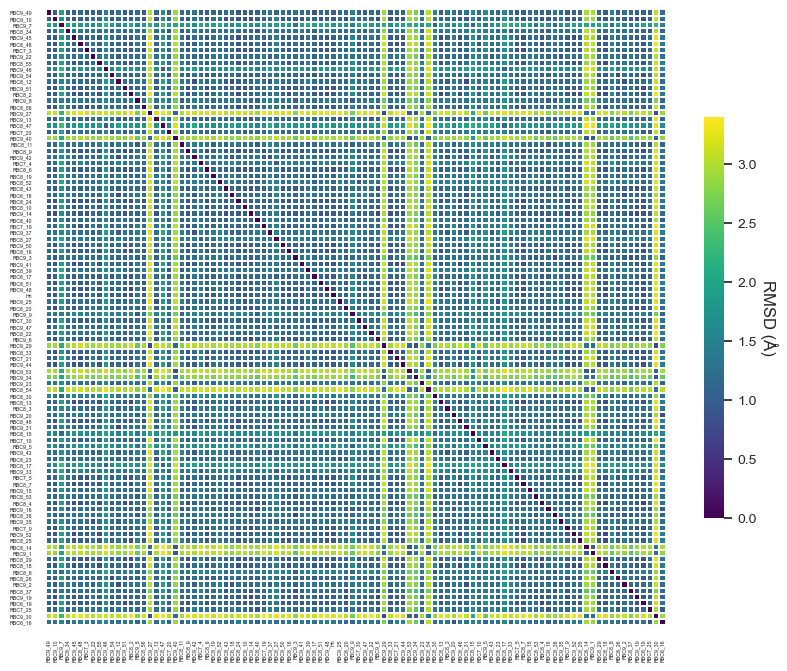

In [3]:
rmsd_matrix_df = pd.read_csv('outputs/rmsd_AS_all_atoms_matrix.csv', index_col=0)

sns.set(font_scale=0.34)
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(rmsd_matrix_df,cmap='viridis',annot=False, fmt=".2f", linewidths=.1, cbar_kws={'shrink': 0.65})

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10.0)
cbar.set_label('RMSD (Å)',rotation=270, labelpad=15, fontsize=12)

plt.savefig('plots/rmsd_AS_all_atoms_matrix.svg', dpi=300)
plt.show()
